# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [ ]:
import pandas as pd
import numpy as np
import os
import 

In [56]:
os.getcwd()
trans_path = "/Users/tim/Documents/Github/analyze_this/Python/Exercise Files/Pandas Course Resources/Pandas Course Resources/project_data/project_transactions.csv"
transactions = pd.read_csv(trans_path)

In [9]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [57]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [58]:
transactions.describe(include = "all")

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06
mean,1.056232e+03,3.404897e+10,3.895059e+02,2.884715e+06,1.009703e+02,3.105908e+00,3.267939e+03,-5.333568e-01,5.632742e+01,-1.579855e-02,-2.805633e-03
std,6.050059e+02,4.723748e+09,1.900530e+02,3.831949e+06,1.152364e+03,4.186300e+00,9.122392e+03,1.229413e+00,2.715024e+01,2.121266e-01,3.924693e-02
min,1.000000e+00,2.698490e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.300200e+02,1.000000e+00,-5.593000e+01,-7.700000e+00
25%,5.480000e+02,3.040798e+10,2.290000e+02,9.172310e+05,1.000000e+00,1.290000e+00,3.300000e+02,-6.800000e-01,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.042000e+03,3.281176e+10,3.920000e+02,1.027960e+06,1.000000e+00,2.000000e+00,3.720000e+02,0.000000e+00,5.700000e+01,0.000000e+00,0.000000e+00
75%,1.581000e+03,4.012804e+10,5.550000e+02,1.132771e+06,1.000000e+00,3.490000e+00,4.220000e+02,0.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
max,2.099000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,3.990000e+00,1.020000e+02,0.000000e+00,0.000000e+00


In [66]:
trans_df = transactions.astype(
    {"DAY":"Int16",
     "QUANTITY":"Int32",
     "STORE_ID":"Int32",
     "WEEK_NO":"Int8"}
)
trans_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                Int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           Int32  
 5   SALES_VALUE        float64
 6   STORE_ID           Int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            Int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: Int16(1), Int32(2), Int8(1), float64(4), int64(3)
memory usage: 145.3 MB


In [60]:
# Check for missing data -- No missing data
trans_df.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [61]:
trans_df.describe(include = 'all').round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [ ]:
#  How many unique households and products are there in the data? The fields household_key and Product_ID will help here.
trans_df[["household_key", "PRODUCT_ID"]].nunique()


unique_hh = (lambda x: f"{x:,}")(trans_df["household_key"].nunique())
unique_prod = (lambda x: f"{x:,}")(trans_df["PRODUCT_ID"].nunique())

print(f"There are {unique_hh} unique households and {unique_prod} unique products in the data set.")

There are 2,099 unique households and 84,138 unique products in the data set.


## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [ ]:
trans_df = (trans_df.assign(
    total_discount = trans_df["RETAIL_DISC"] + trans_df["COUPON_DISC"],
    pct_discount = lambda x: (x["total_discount"] / x["SALES_VALUE"]).abs())
 .drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], axis=1)
)



In [ ]:


trans_df['pct_discount'] = (trans_df["pct_discount"]
                              .where(trans_df["pct_discount"] < 1, 1.0)
                              .where(trans_df["pct_discount"] > 0, 0)
                              )
                              
trans_df

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,pct_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0.108889


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [85]:
nunique_hhs = trans_df["household_key"].nunique()
nunique_bskt = trans_df["BASKET_ID"].nunique()

trans_df.assign(
  total_sales = trans_df["SALES_VALUE"].sum().round(2),
  total_discount = trans_df["total_discount"].sum().round(2),
  overall_discount = lambda x: x["total_discount"]/x["total_sales"],
  total_quantity = trans_df["QUANTITY"].sum().round(2),
  max_quantity_sold = trans_df["QUANTITY"].max(),
  tsv_per_hh = lambda x: x["total_sales"]/ nunique_hhs,
  tsv_per_basket = lambda x: x["total_sales"]/ nunique_bskt
)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,pct_discount,total_sales,overall_discount,total_quantity,max_quantity_sold,tsv_per_hh,tsv_per_basket
0,1364,26984896261,1,842930,1,2.19,31742,1,-1178658.08,0.000000,6666243.5,-0.17681,216713611,89638,3175.914007,28.617979
1,1364,26984896261,1,897044,1,2.99,31742,1,-1178658.08,0.133779,6666243.5,-0.17681,216713611,89638,3175.914007,28.617979
2,1364,26984896261,1,920955,1,3.09,31742,1,-1178658.08,0.000000,6666243.5,-0.17681,216713611,89638,3175.914007,28.617979
3,1364,26984896261,1,937406,1,2.50,31742,1,-1178658.08,0.396000,6666243.5,-0.17681,216713611,89638,3175.914007,28.617979
4,1364,26984896261,1,981760,1,0.60,31742,1,-1178658.08,1.000000,6666243.5,-0.17681,216713611,89638,3175.914007,28.617979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,-1178658.08,0.000000,6666243.5,-0.17681,216713611,89638,3175.914007,28.617979
2146307,1598,42305362535,711,114102,1,8.89,3228,102,-1178658.08,0.000000,6666243.5,-0.17681,216713611,89638,3175.914007,28.617979
2146308,1598,42305362535,711,133449,1,6.99,3228,102,-1178658.08,0.000000,6666243.5,-0.17681,216713611,89638,3175.914007,28.617979
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-1178658.08,0.108889,6666243.5,-0.17681,216713611,89638,3175.914007,28.617979


## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


In [113]:
# Total Sales value at the hh level, so we are grouping by the hh_id
hh_sum = (trans_df
    .groupby(["household_key"])
    .agg({"SALES_VALUE":"sum"})
)

<Axes: ylabel='Frequency'>

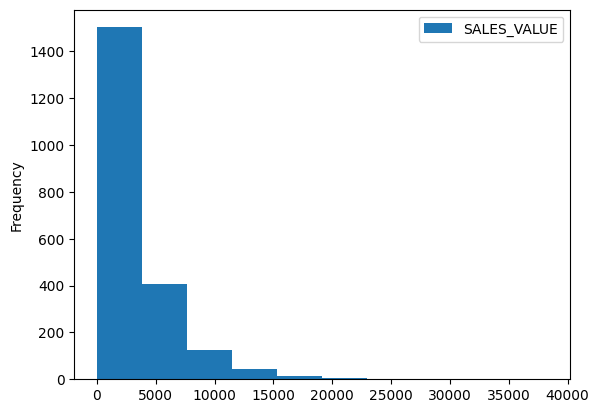

In [93]:
hh_sum.plot.hist()

<Axes: xlabel='household_key'>

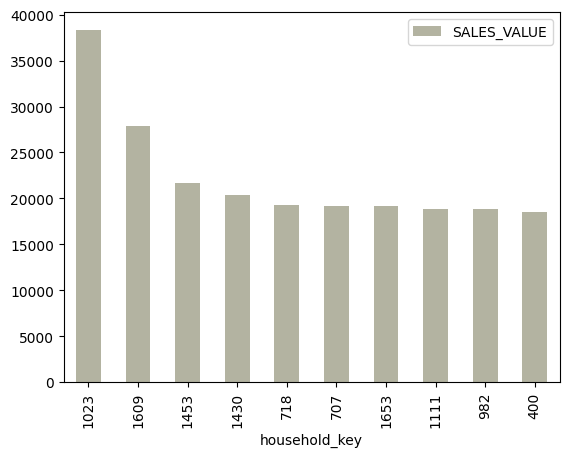

In [123]:
hh_sum.sort_values("SALES_VALUE", ascending = False).iloc[:10].plot.bar(y = "SALES_VALUE", color = "#b3b3a1")


In [112]:
hh_sum.sort_values("SALES_VALUE", ascending = True)

,SALES_VALUE
household_key,
494,8.17
1897,19.58
689,28.96
522,29.34
11,33.39
...,...
718,19299.86
1430,20352.99
1453,21661.29


In [101]:
(trans_df
    .groupby("PRODUCT_ID")
    .agg({"QUANTITY":"sum"})
    .sort_values("QUANTITY", ascending = False)
    .iloc[:10]
)

,QUANTITY
PRODUCT_ID,
6534178,180705254
6533889,16904944
6534166,9880540
6544236,2400961
397896,1181305
1404121,1135804
480014,428311
5668996,266088
6410462,211085


## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.